# KoNLPy 미니프로젝트

***

## 코로나 관련 네이버 기사 제목 분석

- 코로나 관련 네이버 기사 제목 크롤링(관련도순, 200개)
- KoNLPy 이용해서 명사 추출
- 명사 빈도 카운트(가장 많이 나오는 명사 50개)
- 명사 빈도를 이용한 차트(가장 많이 나오는 명사 50개)
- wordcloud
***

### Import

In [1]:
import requests
from bs4 import BeautifulSoup
from konlpy.tag import Okt
from collections import Counter
import nltk
import matplotlib.pylab as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import matplotlib
from wordcloud import WordCloud

### 한글 글꼴 설정

In [2]:
matplotlib.rcParams['axes.unicode_minus'] = False
path = 'C:\\Users\\ahyeon\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicLight.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

### 코로나 관련 네이버 기사 제목 크롤링

In [3]:
page = 1
title = []
 
for page in range(1, 21):
    raw = requests.get("https://search.naver.com/search.naver?where=news&query=코로나&start="+str(page),
                       headers={'User-Agent':'Mozilla/5.0'})
    html = BeautifulSoup(raw.text, "html.parser")

    articles = html.select("div.news_area")

    for ar in articles:
        title.append(ar.select_one("a.news_tit").text)

title = ' '.join(title)

### 명사 추출

In [4]:
okt = Okt()
noun = okt.nouns(title)

In [5]:
print(noun)

['코로나', '첫', '명대', '명', '최', '단계', '압박', '듯', '종합', '서울', '동부', '구치소', '수용', '등', '명', '어제', '코로나', '추가', '확진', '중국', '다롄', '베이징', '코로나', '확산', '항공', '편', '편', '취소', '종합', '윤석열', '직무', '복귀', '후', '첫', '출근', '구치소', '코로나', '확산', '등', '현안', '대응', '세종시', '행안부', '별관', '코로나', '확진', '긴급', '방역', '코로나', '백신', '국내', '첫', '반입', '한미', '군용', '코로나', '영국', '변종', '전염', '백신', '접종', '직무', '복귀', '윤석열', '코로나', '대응', '지시', '중대', '범죄', '우선', '수사', '일본', '서도', '변종', '코로나', '감염', '김정은', '올해', '공개', '활동', '단', '차례', '코로나', '역대', '최저', '서울', '동부', '구치소', '수용', '등', '명', '어제', '코로나', '추가', '확진', '중국', '다롄', '베이징', '코로나', '확산', '항공', '편', '편', '취소', '종합', '윤석열', '직무', '복귀', '후', '첫', '출근', '구치소', '코로나', '확산', '등', '현안', '대응', '세종시', '행안부', '별관', '코로나', '확진', '긴급', '방역', '성탄절', '계속', '코로나', '검사', '행렬', '마트', '백화점', '북적', '종합', '보', '코로나', '백신', '국내', '첫', '반입', '한미', '군용', '영국', '변종', '코로나', '전파', '백신', '배포', '속도', '직무', '복귀', '윤석열', '코로나', '대응', '지시', '중대', '범죄', '우선', '수사', '파우치', '인구', '거의', '백신', '코로나', '집단', 

### 명사 빈도 카운트

In [6]:
count = Counter(noun)
news_count = count.most_common(50)

In [7]:
news_count

[('코로나', 200),
 ('백신', 50),
 ('명', 40),
 ('확', 27),
 ('진자', 27),
 ('종합', 26),
 ('확산', 25),
 ('영국', 25),
 ('역대', 24),
 ('윤석열', 22),
 ('대응', 22),
 ('서도', 21),
 ('첫', 19),
 ('변종', 19),
 ('지시', 18),
 ('수사', 18),
 ('발', 17),
 ('항공기', 17),
 ('승객', 17),
 ('음성', 17),
 ('판정', 17),
 ('의무', 17),
 ('직무', 13),
 ('복귀', 13),
 ('긴급', 13),
 ('보', 13),
 ('신규', 13),
 ('성탄', 12),
 ('미사', 12),
 ('듯', 11),
 ('일본', 11),
 ('감염', 11),
 ('김정은', 11),
 ('올해', 11),
 ('공개', 11),
 ('활동', 11),
 ('단', 11),
 ('차례', 11),
 ('최저', 11),
 ('국내', 10),
 ('정치', 10),
 ('늪', 10),
 ('미군', 10),
 ('차', 10),
 ('분량', 10),
 ('인천', 10),
 ('도착', 10),
 ('내일', 10),
 ('안팎', 10),
 ('전야', 10)]

### 명사 빈도 차트

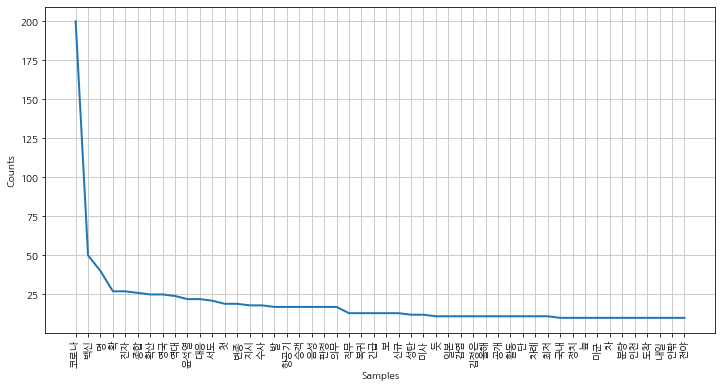

In [8]:
plt.figure(figsize=(12,6))
nltk.Text(noun).plot(50)

### wordcloud

In [9]:
news_title = dict(count)
wordcloud = WordCloud(font_path='C:\\Users\\ahyeon\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicLight.ttf', background_color="white").generate_from_frequencies(news_title)

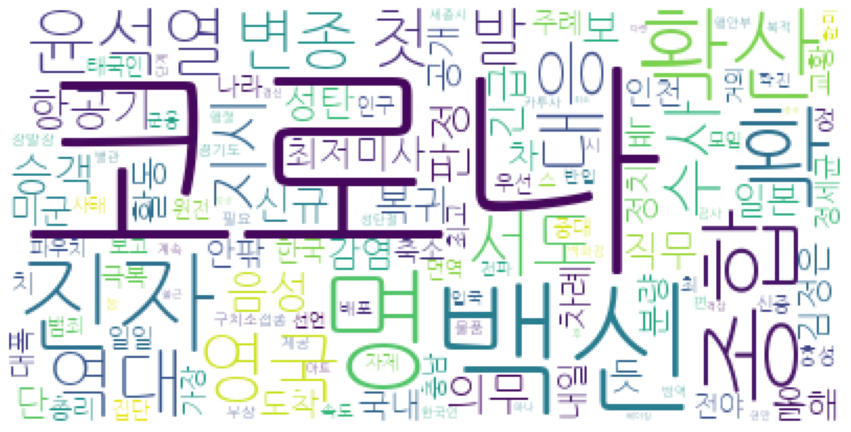

In [10]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()